In [1]:
import datetime
import math
import warnings
from zipfile import ZipFile

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import geopandas
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas
import requests
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from local_module import (
    MapTemplate,
    NhcDownloaderBot,
    NhcDownloaderBotNEW,
    NhcRssParser,
    align_paragraph,
    calcBearing,
    feature_distance,
    fecha_hora,
    tc_legend,
)
from matplotlib.pyplot import imread
from pyproj import CRS
from shapely.geometry import LineString, MultiPoint, Point, Polygon

%matplotlib inline

warnings.filterwarnings("ignore")

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
map_template = MapTemplate()

In [3]:
nch_dl         = NhcDownloaderBotNEW()
cone_gdf       = nch_dl.cone_gdf()[0]
track_line_gdf = nch_dl.cone_gdf()[1]
points_gdf     = nch_dl.cone_gdf()[2]

fcst_radii_gdf = nch_dl.cone_gdf()[0]
init_radii_gdf = nch_dl.cone_gdf()[1]

In [4]:
fcst_radii_gdf

,STORMNAME,STORMTYPE,ADVDATE,ADVISNUM,STORMNUM,FCSTPRD,BASIN,geometry
0,Fiona,HU,800 AM AST Mon Sep 19 2022,20A,7.0,120.0,AL,"LINESTRING (-69.00000 18.80000, -69.30000 19.4..."


In [5]:
cuencas_hidro_gdf              = geopandas.read_file('../shape_files/rd_shapes/vectores/Cuencas_Hidrograficas_RD.shp')
cuencas_presas_gdf             = geopandas.read_file('../shape_files/rd_shapes/vectores/Presas-CuencasAporte.shp')

cuencas_hidro_gdf              = cuencas_hidro_gdf.to_crs("EPSG:4326")
cuencas_presas_gdf             = cuencas_presas_gdf.to_crs("EPSG:4326")

map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

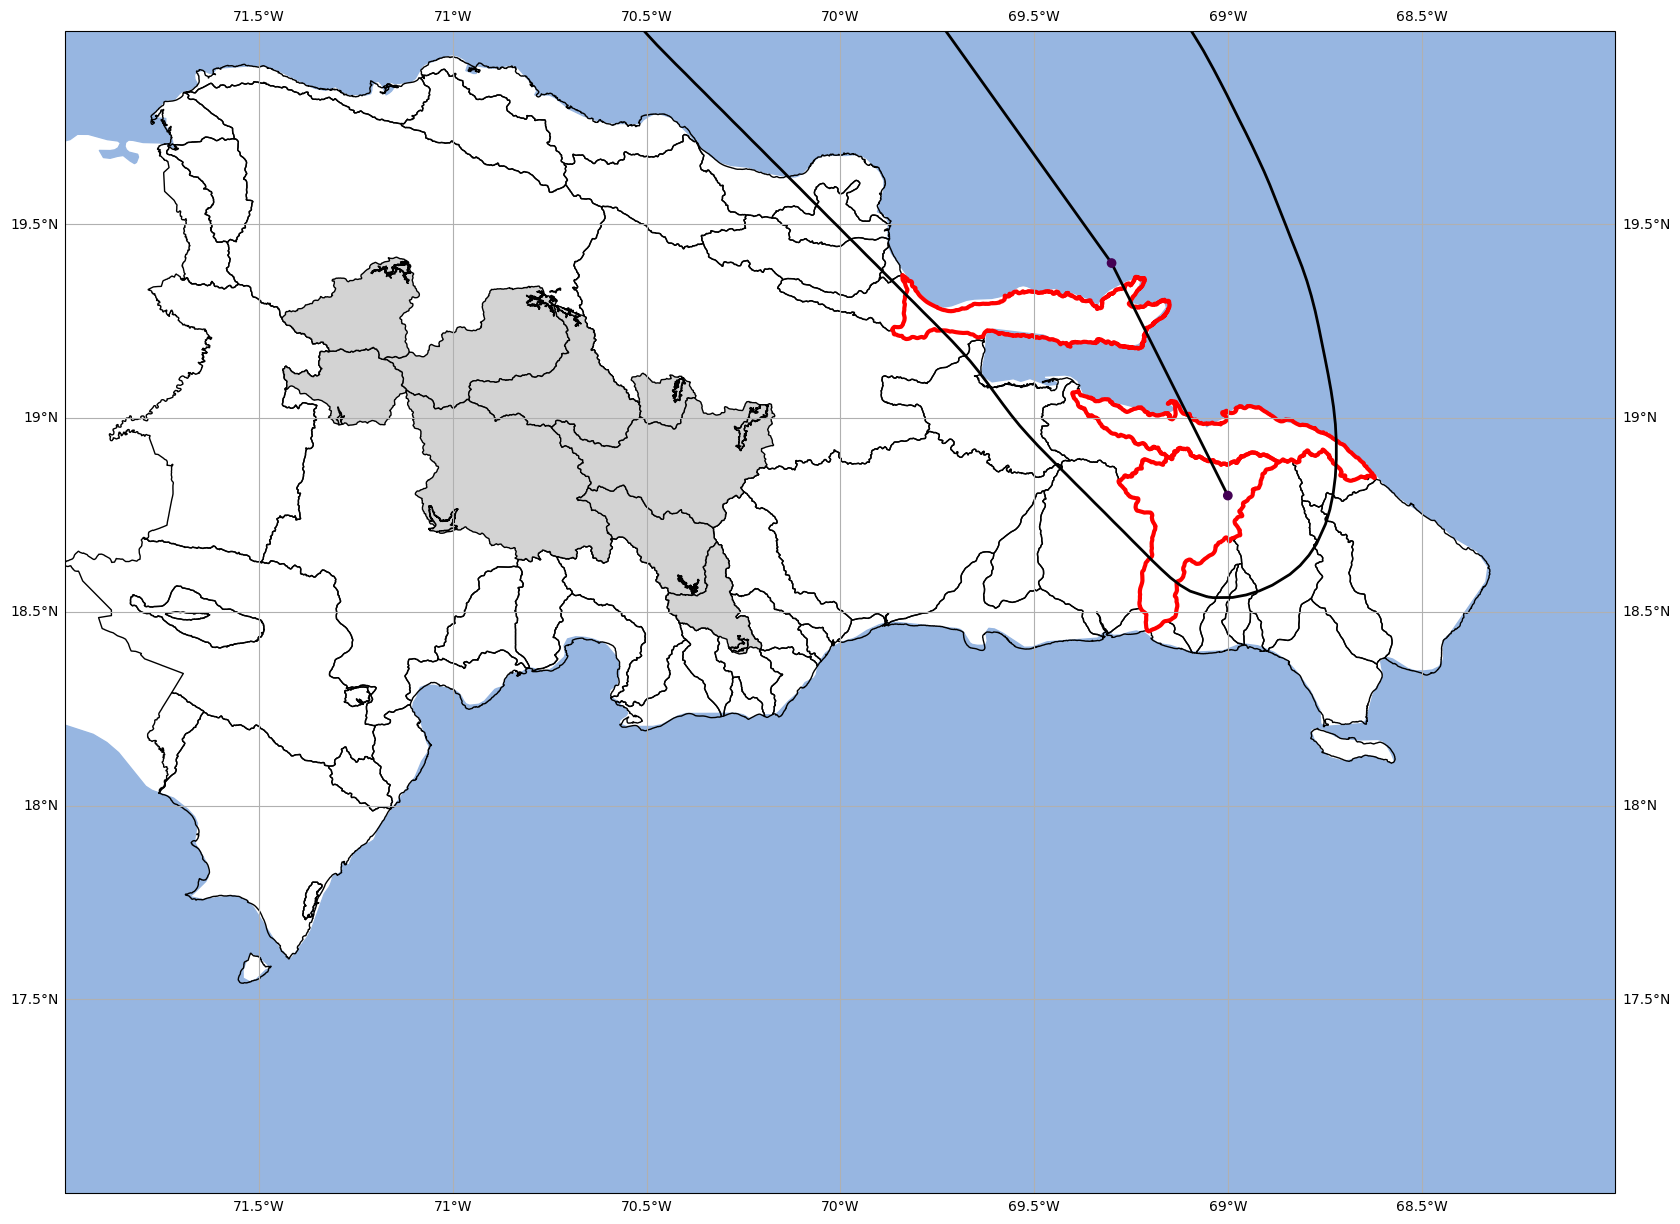

In [6]:
fig = plt.figure(figsize=(20, 20))
ax = plt.subplot(1, 1, 1, projection=map_crs)

# ax.set_extent([-100, -50, 10, 40])
ax.set_extent([-72, -68, 17, 20])
ax.add_feature(cfeat.OCEAN.with_scale("10m"))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

# ax.add_geometries(fcst_radii_gdf['geometry'], crs=map_template.data_crs, facecolor='brown',
#                   edgecolor='none', linewidth=0.1, alpha=0.5, zorder = 10001)
# ax.add_geometries(init_radii_gdf['geometry'], crs=map_template.data_crs, facecolor='none',
#                   edgecolor='black', linewidth=1)

# buffer_distance = 50
# fcst_radii_gdf_dis = fcst_radii_gdf.dissolve(by="RADII")
# # fcst_radii_gdf_a_dis = fcst_radii_gdf_a_dis.buffer(distance=1, join_style=1, cap_style=1).simplify(1)
# fcst_radii_gdf_dis = fcst_radii_gdf_dis.buffer(buffer_distance, join_style=1).buffer(
#     -buffer_distance, join_style=1
# )
# ax.add_geometries(
#     fcst_radii_gdf_dis,
#     crs=map_template.data_crs,
#     alpha=0.5,
#     color=["#6969FF", "#0000FF", "#000080"],
# )

# ax.add_geometries(
#     cuencas_hidro_gdf["geometry"],
#     crs=data_crs,
#     facecolor="lightgray",
#     edgecolor="none",
#     alpha=0.5,
# )

# ax.add_geometries(
#     coastline_gdf["geometry"],
#     crs=data_crs,
#     facecolor="none",
#     edgecolor="black",
#     linewidth=1,
#     alpha=0.7,
# )

ax.add_geometries(
    cone_gdf["geometry"],
    crs=data_crs,
    facecolor="none",
    edgecolor="black",
    linewidth=2,
    zorder=100,
)

ax.add_geometries(
    track_line_gdf["geometry"],
    crs=data_crs,
    facecolor="none",
    edgecolor="black",
    linewidth=2,
    zorder=100,
)
sc = ax.scatter(
    points_gdf["LON"],
    points_gdf["LAT"],
    transform=data_crs,
    zorder=100,
    c=points_gdf["MAXWIND"],
)

track = LineString(zip(points_gdf["LON"], points_gdf["LAT"]))


def colorize_state(geometry):
    # facecolor = (0.9375, 0.9375, 0.859375)
    edgecolor = "black"
    linewidth = 1
    if geometry.intersects(track):
        # facecolor = 'red'
        edgecolor = "red"
        linewidth = 3
    return {"edgecolor": edgecolor, "linewidth": linewidth}


# ax.add_geometries(
#     división_prov_muni_y_dist_muni["geometry"],
#     crs=data_crs,
#     styler=colorize_state,
#     facecolor="none",
# )
ax.add_geometries(
    cuencas_hidro_gdf["geometry"],
    crs=data_crs,
    facecolor="none",
    styler=colorize_state,
)

ax.add_geometries(
    cuencas_presas_gdf["geometry"],
    crs=data_crs,
    facecolor="lightgray",
    edgecolor="black"
)

plt.gcf()
plt.savefig(f"output_cone", bbox_inches="tight", pad_inches=0, dpi=300)